In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Load the dataset from 'csv' file.
df = pd.read_csv('seattle-weather.csv')

# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# It suppress warning messages that might be generated during the execution of a program.
import warnings
warnings.filterwarnings('ignore')

# Display the number of missing values in each column of the DataFrame
print(df.isnull().sum())










date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64


In [6]:

# Convert 'date' column to datetime and extract features
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['year'] = df['date'].dt.year

# Encode the 'weather' column into numeric values
df['weather'] = df['weather'].astype('category').cat.codes


In [7]:
# Define features (X) and target (y)
X = df[['precipitation', 'temp_max', 'temp_min', 'wind']]
y = df['weather']

In [8]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:


# Scale the Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [10]:


# Initialize the KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [11]:
# Predict weather for a subset of the data
random_samples = df.sample(n=10)
predicted_weather = knn.predict(scaler.transform(random_samples[['precipitation', 'temp_max', 'temp_min', 'wind']]))

# Decode predictions to weather types
weather_types = ['drizzle', 'rain', 'fog', 'sun', 'snow']  # Make sure this list matches your encoded weather types
random_samples['predicted_weather'] = [weather_types[p] for p in predicted_weather]

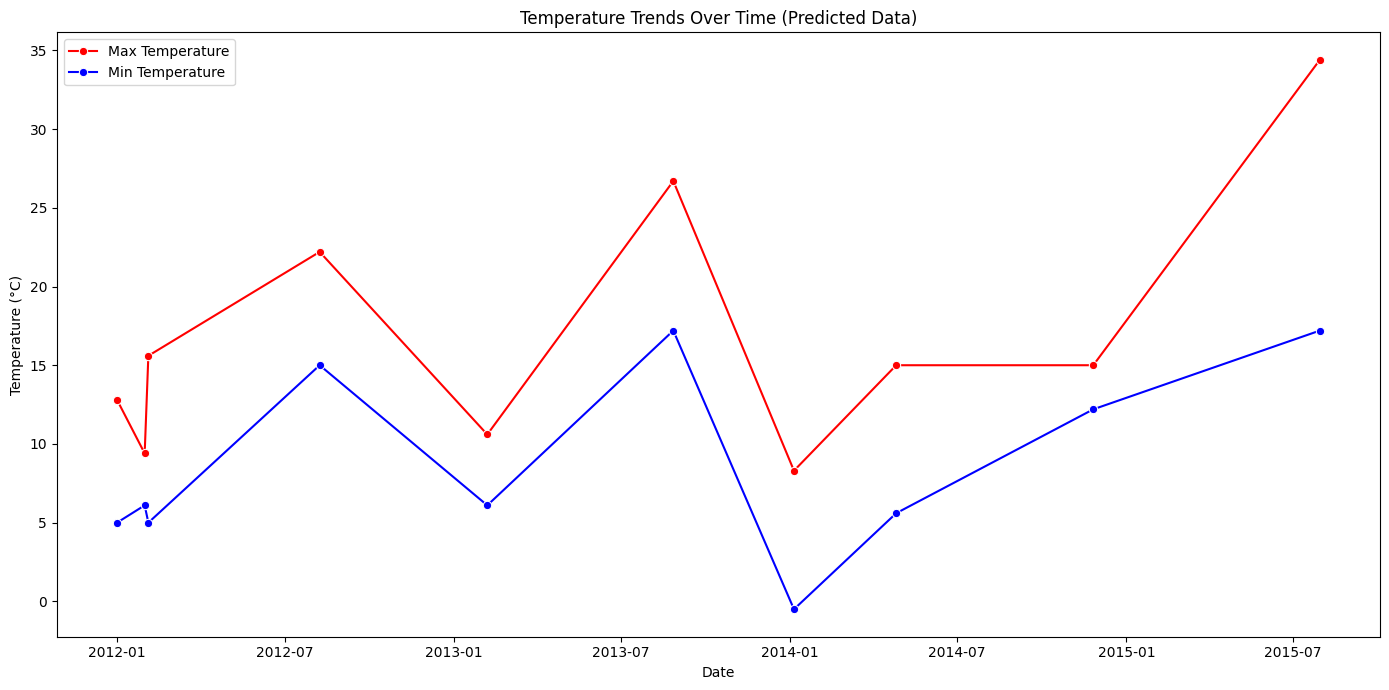

In [12]:

# Line Plot - Temperature Trends Over Time
plt.figure(figsize=(14, 7))
sns.lineplot(x=random_samples['date'], y=random_samples['temp_max'], label='Max Temperature', marker='o', color='red')
sns.lineplot(x=random_samples['date'], y=random_samples['temp_min'], label='Min Temperature', marker='o', color='blue')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Trends Over Time (Predicted Data)')
plt.legend()
plt.tight_layout()
plt.show()

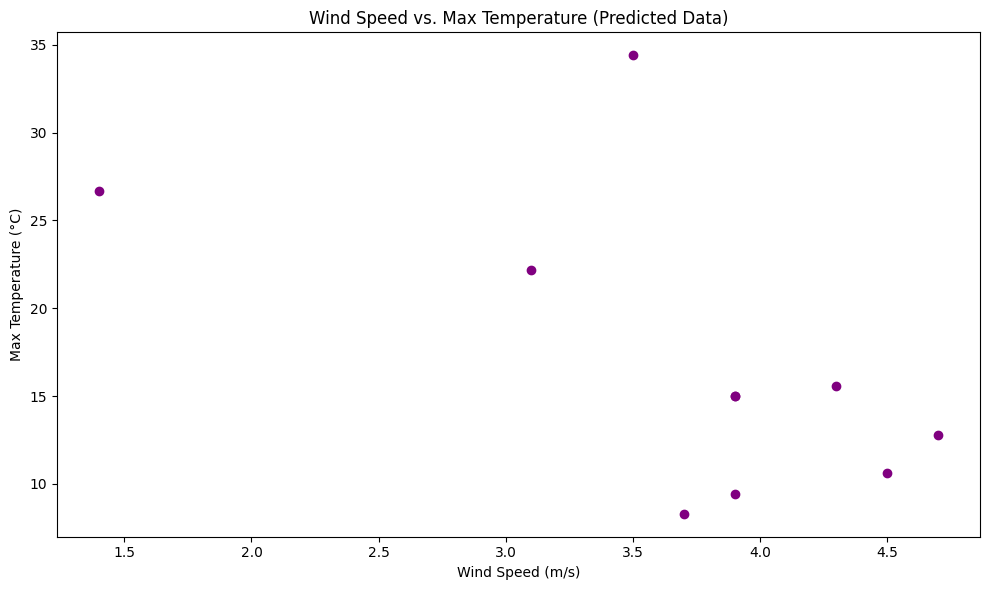

In [17]:

# Scatter Plot - Wind Speed vs. Max Temperature
plt.figure(figsize=(10, 6))
plt.scatter(random_samples['wind'], random_samples['temp_max'], color='purple')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Max Temperature (°C)')
plt.title('Wind Speed vs. Max Temperature (Predicted Data)')
plt.tight_layout()
plt.show()

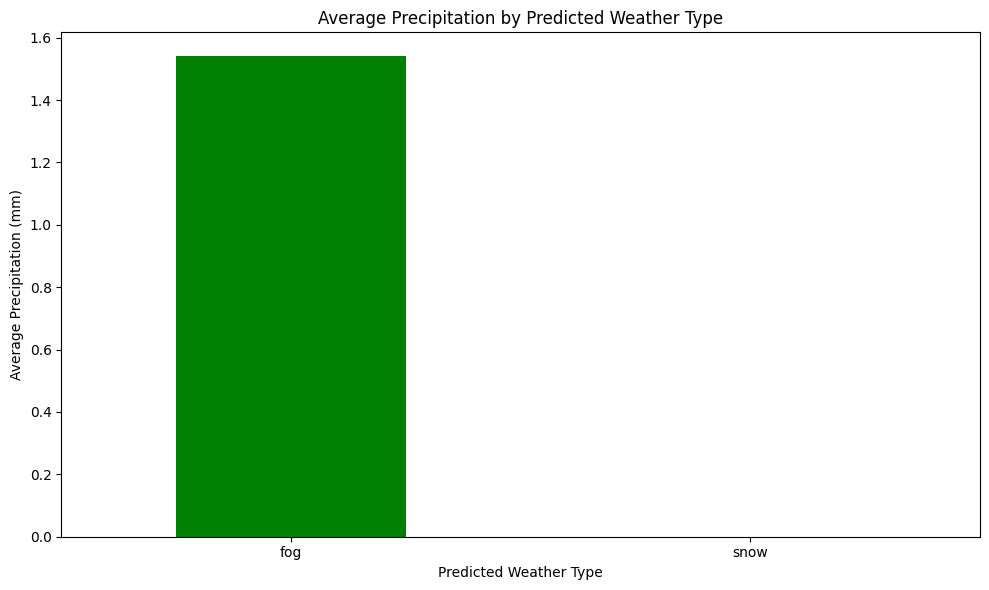

In [14]:


# Bar Plot - Average Precipitation by Predicted Weather Type
plt.figure(figsize=(10, 6))
average_precipitation = random_samples.groupby('predicted_weather')['precipitation'].mean()
average_precipitation.plot(kind='bar', color='green')
plt.xlabel('Predicted Weather Type')
plt.ylabel('Average Precipitation (mm)')
plt.title('Average Precipitation by Predicted Weather Type')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

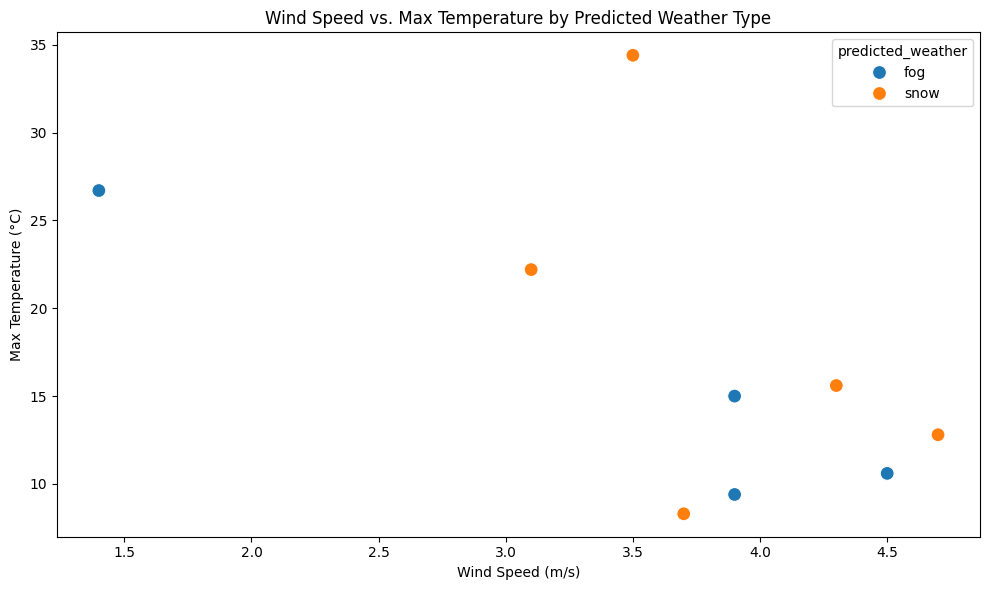

In [16]:

# Scatter Plot - Wind Speed vs. Temperature Colored by Predicted Weather Type
plt.figure(figsize=(10, 6))
sns.scatterplot(x=random_samples['wind'], y=random_samples['temp_max'], hue=random_samples['predicted_weather'], s=100)
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Max Temperature (°C)')
plt.title('Wind Speed vs. Max Temperature by Predicted Weather Type')
plt.tight_layout()
plt.show()